# Single Variable (Univariate) Linear Regression

Using the toy dataset loaded below, the goal is to write the linear regression algorithm with Gradient Descent from scratch ! This will help you familiarize yourselves with the essential steps of most machine learning algorithms.

## The Data
This is a toy dataset of 100 examples, where the lot area is in m2 and the sale price is in thousands.  The sale prices have been divided by a factor of 1000 to have features and labels on a similar scale.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Input data
data = pd.read_csv('data.csv', names=['LotArea', 'SalePrice'])
data.head()

,LotArea,SalePrice
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
a = np.array([1,2,3])
1 + 3*a

array([ 4,  7, 10])

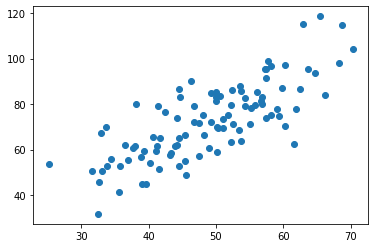

In [2]:
X = data.iloc[:, 0] 
labels = data.iloc[:, 1]
plt.scatter(X, labels)
plt.show()

## The model

For single variable linear regression, our model is defined by the function:  
$$h(x) = \theta_0 + \theta_1x$$

Write a function which returns a numpy array of predictions, using as input an array of examples with a single feature, and the parameters of the model.

In [3]:
def predict(X, theta0, theta1):
    
    # transcribe the formula above, easy enough :
    preds = theta0 + theta1 * X
    
    return preds

In [4]:
predict(X, theta0=1, theta1=1)

0     33.502345
1     54.426804
2     62.530358
3     48.475640
4     60.813208
        ...    
95    51.030174
96    50.239765
97    51.039576
98    49.149859
99    26.128485
Name: LotArea, Length: 100, dtype: float64

**Expected output for the first example is 54.43**

## The Cost function

The cost function allows you to evaluate how good your model fits the data.  In this case, we are going to use the MSE (Mean Squared Error) loss, defined as :
$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m (h(x^i) - y^i)^2 $$ 

where *m* is the number of examples, so 100 in our case.

This gives us the average error over our model's predictions.  Write a function which outputs the cost.

In [4]:
def cost(preds, labels):
    """
    Preds and labels are numpy arrays, so no need to use "for" loops !
    Try doing some of the operations on paper with numpy arrays of only 2-3 examples to make things easier.
    """
    # length of the dataset
    m = len(labels)
    # write out the formula above 
    loss = 1/(2 * m) * np.sum((preds - labels)**2)
    
    return loss

In [6]:
cost(labels+1, labels)

0.5

## Gradient Descent

Gradient Descent performs updates on the weights of the model, in order to minimize the cost/loss (these can be used interchangeably).  
Here is the formula for the update of each parameter in the model :
$$ \theta_0 = \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h(x^i) - y^i) $$
$$ \theta_1 = \theta_1 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h(x^i) - y^i)x^i$$ 

Where *alpha* is the learning_rate (the size of the update steps we want to take) and the term on the right is the formula for the partial derivative of the cost function, with respect to each parameter.
Write a function which performs these updates.

In [5]:
def gradient_descent(alpha, X, preds, labels, theta0, theta1):
    
    # write out the part of the formula which comes right after alpha, the partial derivatives :
    partial_theta0 = np.mean(preds-labels)
    
    partial_theta1 = np.mean((preds-labels)*X)
    
    
    # update the parameters!
    theta0 -= alpha * partial_theta0
    theta1 -= alpha * partial_theta1
    
    return theta0, theta1

## Main Loop

We can now go through the data and fit our model :

epoch 0


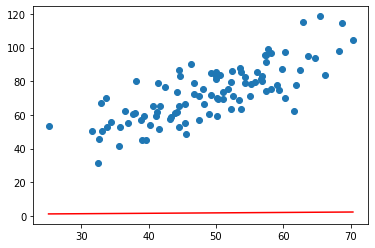

Loss = 2645.6382499703377
epoch 1


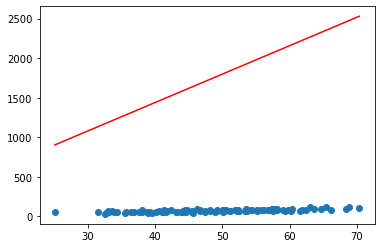

Loss = 1481584.6015216778
theta0=1.3481381850661416, theta1=35.94246466209976


In [15]:
import random
random.seed(42)

# Choose the "hyperparameters" you want :
# The learning rate, typically very low, between 1e-2 and 1e-6 depending on the task.  
# 1e-4 is recommended to begin with in this case
lr = 1e-2
# The number of passes over the dataset, ie. the number of times we update the weights.  These are called "epochs".
epochs = 100 

m = len(X) # Number of elements in X


# Initilize the cost/loss to a very high value
prev_loss = 1e9
# Initialize the parameters, setting them to random values between 0 and 1:
theta0, theta1 = random.random(), random.random()


# Loop
for i in range(epochs): 
       
    # compute the model's predictions
    Y_pred = predict(X, theta0, theta1)
    
    # plot the model to have a visual intuition of the model's progress
    print(f'epoch {i}')
    plt.scatter(X, labels)
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
    plt.show()
    
    
    # compute the loss
    loss = cost(Y_pred, labels)
    print(f'Loss = {loss}')
    
    # To see if the model is improving, compare this loss to the previous loss.
    # if the difference is smaller than 1e-2, then we can consider the model has found the global minimum 
    # and there is no need to continue updating the weights.
    if prev_loss - loss < 1e-2:
        break
        
    # if the difference is significant, update the previous loss
    prev_loss = loss
                     
    # and update the parameters  
    theta0, theta1 = gradient_descent(lr, X, Y_pred, labels, theta0, theta1)

print(f'{theta0=}, {theta1=}')

**Expected values** for theta0 and theta1 should be 
* theta0 => 0.66
* theta1 => 1.46

Play around with the learning rates !! Set 100 epochs and comment out the condition with the break statement beforehand and then try:
* 5e-4 : how any epochs til the loss stops changing ?
* 1e-2 : what's going on with the model ?

# Multivariate Linear Regression

In [108]:
import numpy as np

# m: # of training examples
# n: # of features
# y is in R^(1 * m)
# X is in R^(n * m)
# w is in R^(n * 1) 

class LinearRegression():
    def __init__(self):
        self.learning_rate = 0.01
        self.total_iterations = 10000
    
    def yhat(self, X, w):
        # yhat = w1x1 + w2x2 + w3x3 ...
        # w1 will be the bias and x1 will = 1 for every example
        return np.dot(w.T, X)
    
    def loss(self, yhat, y):
        L = np.mean(np.power(yhat-y, 2))
        return L
    
    def gradient_descent(self, w, X, y, yhat):
        # derivative dL/dw is 2/m * X dot (yhat - y)T
        dLdw = 2/self.m * np.dot(X, (yhat-y).T)
        w -= self.learning_rate * dLdw
        return w

    def main(self, X, y):
        X1 = np.ones((1, X.shape[1])) # 1 * m matrix of ones
        X = np.append(X, X1, axis=0) # add as a row

        self.m = X.shape[1]
        self.n = X.shape[0]
        w = np.zeros((self.n, 1))

        for epoch in range(self.total_iterations+1):
            yhat = self.yhat(X, w)
            if epoch % 2000 == 0: 
                print(f'Loss is {self.loss(yhat, y)} at epoch {epoch}')
            w = self.gradient_descent(w, X, y, yhat)
        
        return w

    



if __name__ == '__main__':
    X = np.random.randn(5, 500)
    y = 3 * X[0, :] + np.random.randn(1, 500) * 0.1 # added noise 
    regr = LinearRegression()
    w = regr.main(X, y) 



Loss is 8.600939561452826 at epoch 0
Loss is 0.009791333001155226 at epoch 2000
Loss is 0.009791333001155226 at epoch 4000
Loss is 0.009791333001155226 at epoch 6000
Loss is 0.009791333001155226 at epoch 8000
Loss is 0.009791333001155226 at epoch 10000


In [115]:
# Create a toy dataset

X = np.random.randn(5, 500) # 5 features, 500 examples
y = 3 * X[0, :] + np.random.randn(1, 500) * 0.1 # to vreate the labels, take the first row of X and add noise => *3, add random numbers*0.1


X1 = np.ones((1, X.shape[1]))
X = np.append(X, X1, axis=0) # add "dummy" features as a row of ones
#print(X)

In [128]:
# m => number of examples
# n => number of features
m = X.shape[1]
n = X.shape[0]

# initialize parameter/weight vector
theta = np.random.randn(n, 1)

In [129]:
lr = 1e-2
epochs = 10000

for epoch in range(epochs+1):
    preds = np.dot(theta.T, X)
    loss = np.mean((preds - y)**2) / 2
    #print(f'Loss : {loss}')
    if epoch % 2000 == 0: 
        print(f'Loss is {loss} at epoch {epoch}')
    
    dL_dtheta = 1/m * np.dot(X, (preds-y).T)
    theta -= lr * dL_dtheta
 

Loss is 10.061233650744652 at epoch 0
Loss is 0.005062600483811398 at epoch 2000
Loss is 0.0050626004838113465 at epoch 4000
Loss is 0.0050626004838113465 at epoch 6000
Loss is 0.0050626004838113465 at epoch 8000
Loss is 0.0050626004838113465 at epoch 10000
